In [17]:
from sage.all import RR, sqrt, vector, VectorSpace
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gram_schmidt_R(vectors):
    """
    Performs the Gram–Schmidt process on a list of real SageMath vectors
    to produce an orthonormal basis.

    Parameters
    ----------
    vectors : list[Vector]
        A list of linearly independent SageMath vectors over RR.

    Returns
    -------
    list[Vector]
        An orthonormal list of vectors spanning the same subspace as the input.
    """
    def dot(u, v):
        return sum(ui * vi for ui, vi in zip(u, v))

    orthonormal_basis = []
    for v in vectors:
        # Subtract projections onto previous basis vectors
        for u in orthonormal_basis:
            v = v - dot(v, u) * u
        # Normalize
        v = v / sqrt(dot(v, v))
        orthonormal_basis.append(v)

    return orthonormal_basis


In [18]:
v1 = vector(RR, [1, 1, 0])
v2 = vector(RR, [1, 0, 1])
v3 = vector(RR, [0, 1, 1])

basis = gram_schmidt_R([v1, v2, v3])
for i, b in enumerate(basis, start=1):
    print(f"u{i} =", b, f"‖u{i}‖² =", b.dot_product(b))

u1 = (0.707106781186547, 0.707106781186547, 0.000000000000000) ‖u1‖² = 1.00000000000000
u2 = (0.408248290463863, -0.408248290463863, 0.816496580927726) ‖u2‖² = 1.00000000000000
u3 = (-0.577350269189626, 0.577350269189626, 0.577350269189626) ‖u3‖² = 1.00000000000000


Original basis:
(1, 0, 1)
(1, -1, 1)
(1, 1, 2)

Orthonormal basis:
(1/2*sqrt(2), 0, 1/2*sqrt(2))
(0, -1, 0)
(-sqrt(1/2), 0, sqrt(1/2))


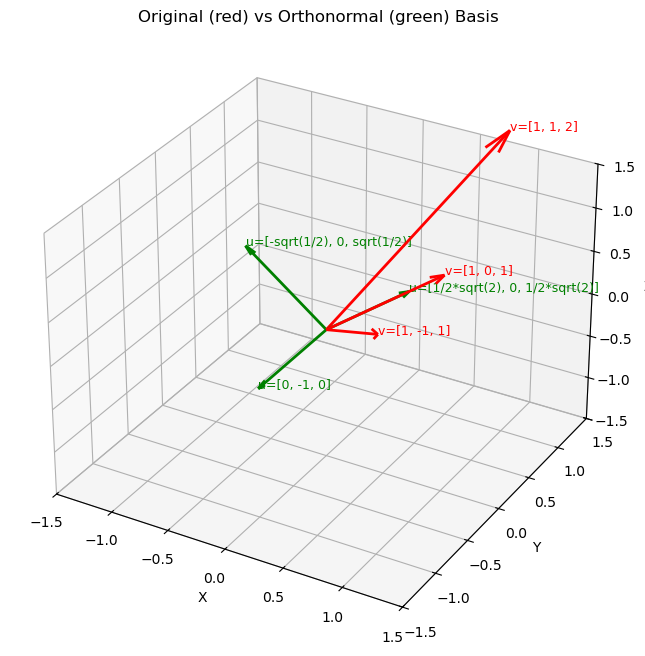

In [19]:
# Using the previous function to copmute the orthonormal basis for a given set of vectors
V = VectorSpace(QQ, 3)
original_basis = [V([1, 0, 1]), V([1, -1, 1]), V([1, 1, 2])]

# Compute orthonormal basis
orthonormal_basis = gram_schmidt_R(original_basis)

# Display results
print("Original basis:")
for v in original_basis:
    print(v)

print("\nOrthonormal basis:")
for u in orthonormal_basis:
    print(u)


# --- Visualization with Matplotlib ---
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Origin
origin = [0, 0, 0]

# Plot original basis (red)
for v in original_basis:
    ax.quiver(*origin, v[0], v[1], v[2], color='red', linewidth=2, arrow_length_ratio=0.1)
    ax.text(v[0], v[1], v[2], f'v={list(v)}', color='red', fontsize=9)

# Plot orthonormal basis (green)
for u in orthonormal_basis:
    ax.quiver(*origin, u[0], u[1], u[2], color='green', linewidth=2, arrow_length_ratio=0.1)
    ax.text(u[0], u[1], u[2], f'u={list(u)}', color='green', fontsize=9)

# Labels and styling
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Original (red) vs Orthonormal (green) Basis')

plt.show()
